# Phase 1 - Week 1 - Day 5 AM - Technical Test 1 - Business Use Case & Data Analysis

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Read the dataset
df_raw = pd.read_csv('ad_campaign_data.csv')

# Data Processing & Cleaning

## Initial Data Exploration
Let's first examine our dataset to understand its structure and identify potential issues.

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
df_raw.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           94 non-null     object 
 1   Ad Name        94 non-null     object 
 2   Reach          94 non-null     int64  
 3   Impressions    94 non-null     int64  
 4   Ads Spent      94 non-null     int64  
 5   Clicks         90 non-null     object 
 6   Installs       88 non-null     float64
 7   Registrations  90 non-null     float64
 8   Purchases      90 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.7+ KB


In [ ]:
print("\nMissing values:")
df_raw.isnull().sum()


Missing values:


,0
Date,0
Ad Name,0
Reach,0
Impressions,0
Ads Spent,0
Clicks,4
Installs,6
Registrations,4
Purchases,4


In [ ]:
print("\nFirst few rows:")
df_raw.head()


First few rows:


,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
0,2020-07-01 00:00:00,Ads A,261543,2112643,5848686,1497.0,465.00,212.00,93.00
1,2020-07-02 00:00:00,Ads B,891111,1643513,7357970,5361.0,1301.00,18.00,8.00
2,2020-07-03 00:00:00,Ads C,1554528,545057,6314069,7308.0,1263.00,158.00,75.00
3,2020-07-04 00:00:00,Ads A,550485,467959,3040367,5313.0,708.00,220.00,106.00
4,2020-07-05 00:00:00,Ads B,646758,594967,8843206,4877.0,NaN,24.00,13.00


## Data Cleaning Steps

In [ ]:
# Copy the raw dataset so we can keep the original data intact
df = df_raw.copy()
df.head()

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
0,2020-07-01 00:00:00,Ads A,261543,2112643,5848686,1497.0,465.00,212.00,93.00
1,2020-07-02 00:00:00,Ads B,891111,1643513,7357970,5361.0,1301.00,18.00,8.00
2,2020-07-03 00:00:00,Ads C,1554528,545057,6314069,7308.0,1263.00,158.00,75.00
3,2020-07-04 00:00:00,Ads A,550485,467959,3040367,5313.0,708.00,220.00,106.00
4,2020-07-05 00:00:00,Ads B,646758,594967,8843206,4877.0,NaN,24.00,13.00


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
0,2020-07-01,Ads A,261543,2112643,5848686,1497.0,465.00,212.00,93.00
1,2020-07-02,Ads B,891111,1643513,7357970,5361.0,1301.00,18.00,8.00
2,2020-07-03,Ads C,1554528,545057,6314069,7308.0,1263.00,158.00,75.00
3,2020-07-04,Ads A,550485,467959,3040367,5313.0,708.00,220.00,106.00
4,2020-07-05,Ads B,646758,594967,8843206,4877.0,NaN,24.00,13.00


In [ ]:
# Show the missing values of 'Date' column
df[df['Date'].isnull()]

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
14,NaT,Ads C,1854953,1378485,528780,5661.0,1213.00,247.00,130.00
68,NaT,Ads C,557353,1717887,5192753,NaN,86.00,96.00,45.00


In [ ]:
# Delete the missing values from 'Date' column
df = df.dropna(subset=['Date'])

In [ ]:
# Recheck the missing values of the dataset
df.isnull().sum()

,0
Date,0
Ad Name,0
Reach,0
Impressions,0
Ads Spent,0
Clicks,3
Installs,6
Registrations,4
Purchases,4


In [ ]:
# Check for non-standard missing values in the 'Clicks' column
df[df['Clicks'] == 'error']

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
12,2020-07-13,Ads A,1893411,680216,8621866,error,NaN,161.00,87.00
27,2020-07-28,Ads A,1174260,2447092,6605743,error,298.00,4.00,2.00
47,2020-07-18,Ads C,962512,1173546,6436944,error,629.00,127.00,55.00


In [ ]:
# Replace non-standard missing values with NaN
df.replace("error", np.nan, inplace=True)

<ipython-input-39-b4b0fad3466a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("error", np.nan, inplace=True)


In [ ]:
# Recheck for missing values
df.isnull().sum()

,0
Date,0
Ad Name,0
Reach,0
Impressions,0
Ads Spent,0
Clicks,6
Installs,6
Registrations,4
Purchases,4


In [ ]:
# Convert 'Clicks' column to numeric
df['Clicks'] = pd.to_numeric(df['Clicks'])

# Recheck the data types
df.dtypes

<ipython-input-41-4d619a174a1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clicks'] = pd.to_numeric(df['Clicks'])


,0
Date,datetime64[ns]
Ad Name,object
Reach,int64
Impressions,int64
Ads Spent,int64
Clicks,float64
Installs,float64
Registrations,float64
Purchases,float64


In [ ]:
num_cols = ["Clicks", "Installs", "Registrations", "Purchases"]
for col in num_cols:
    print(f"Skewness of {col}= {df[col].skew()}")
    print(f"Mean of {col}= {df[col].mean()}")
    print(f"Median of {col}= {df[col].median()}")
    print("---" * 20)


Skewness of Clicks= 0.0014322882334606084
Mean of Clicks= 6188.232558139535
Median of Clicks= 5655.5
------------------------------------------------------------
Skewness of Installs= -0.20527244364786723
Mean of Installs= 821.6627906976744
Median of Installs= 878.5
------------------------------------------------------------
Skewness of Registrations= -0.17423776220443618
Mean of Registrations= 148.8409090909091
Median of Registrations= 164.5
------------------------------------------------------------
Skewness of Purchases= -0.022833663108505355
Mean of Purchases= 72.6590909090909
Median of Purchases= 77.5
------------------------------------------------------------


In [ ]:
# Fill the 'Clicks', 'Installs', and 'Registrations' columns with the median value
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Recheck the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 93
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           92 non-null     datetime64[ns]
 1   Ad Name        92 non-null     object        
 2   Reach          92 non-null     int64         
 3   Impressions    92 non-null     int64         
 4   Ads Spent      92 non-null     int64         
 5   Clicks         92 non-null     float64       
 6   Installs       92 non-null     float64       
 7   Registrations  92 non-null     float64       
 8   Purchases      92 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 7.2+ KB


<ipython-input-43-0f232dd7701d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


In [ ]:
# Remove rows with negative spend
df[df["Ads Spent"] < 0]

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases
21,2020-07-22,Ads A,917514,1541488,-3044645,3576.00,878.50,294.00,128.00
52,2020-07-23,Ads B,564507,340126,-5385083,8288.00,1277.00,61.00,33.00


In [ ]:
# Remove rows with negative spend
df = df[df["Ads Spent"] >= 0]

In [ ]:
# Check duplicates data
df.duplicated().sum()

0

- Cost Per Click (CPC): Ads Spent / Clicks
- Click-Through Rate (CTR): (Clicks / Impressions) * 100
- Cost Per Install (CPI): Ads Spent / Installs
- Install Rate: (Installs / Clicks) * 100
- Registration Rate: (Registrations / Installs) * 100
- Purchase Conversion Rate: (Purchases / Registrations) * 100

In [ ]:
# KPI Calculations
def calculate_kpis(df):
    # Cost Per Click (CPC)
    df['CPC'] = df['Ads Spent'] / df['Clicks']

    # Click-Through Rate (CTR)
    df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

    # Cost Per Install (CPI)
    df['CPI'] = df['Ads Spent'] / df['Installs']

    # Install Rate
    df['Install_Rate'] = (df['Installs'] / df['Clicks']) * 100

    # Registration Rate
    df['Registration_Rate'] = (df['Registrations'] / df['Installs']) * 100

    # Purchase Conversion Rate
    df['Purchase_Rate'] = (df['Purchases'] / df['Registrations']) * 100

    return df

# Calculate KPIs
df = calculate_kpis(df)

<ipython-input-47-5eb1f9a48ed6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPC'] = df['Ads Spent'] / df['Clicks']
<ipython-input-47-5eb1f9a48ed6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTR'] = (df['Clicks'] / df['Impressions']) * 100
<ipython-input-47-5eb1f9a48ed6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Show the latest condition of dataset
df.head()

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases,CPC,CTR,CPI,Install_Rate,Registration_Rate,Purchase_Rate
0,2020-07-01,Ads A,261543,2112643,5848686,1497.00,465.00,212.00,93.00,3906.94,0.07,12577.82,31.06,45.59,43.87
1,2020-07-02,Ads B,891111,1643513,7357970,5361.00,1301.00,18.00,8.00,1372.50,0.33,5655.63,24.27,1.38,44.44
2,2020-07-03,Ads C,1554528,545057,6314069,7308.00,1263.00,158.00,75.00,863.99,1.34,4999.26,17.28,12.51,47.47
3,2020-07-04,Ads A,550485,467959,3040367,5313.00,708.00,220.00,106.00,572.25,1.14,4294.30,13.33,31.07,48.18
4,2020-07-05,Ads B,646758,594967,8843206,4877.00,878.50,24.00,13.00,1813.25,0.82,10066.26,18.01,2.73,54.17


In [ ]:
# Make sure 'Date values are in ascending order
df = df.sort_values(by="Date", ascending=True)

# Check the last few rows
df.tail()

,Date,Ad Name,Reach,Impressions,Ads Spent,Clicks,Installs,Registrations,Purchases,CPC,CTR,CPI,Install_Rate,Registration_Rate,Purchase_Rate
88,2020-07-29,Ads B,1387665,1377091,6410902,11446.00,23.00,36.00,21.00,560.10,0.83,278734.87,0.20,156.52,58.33
28,2020-07-29,Ads B,191119,1650040,553759,6996.00,32.00,103.00,39.00,79.15,0.42,17304.97,0.46,321.88,37.86
29,2020-07-30,Ads C,154465,1313144,1929252,357.00,1420.00,172.00,97.00,5404.07,0.03,1358.63,397.76,12.11,56.40
59,2020-07-30,Ads C,1175021,379457,875406,9273.00,1142.00,194.00,87.00,94.40,2.44,766.56,12.32,16.99,44.85
89,2020-07-30,Ads C,1459714,1941952,3671470,2135.00,419.00,280.00,142.00,1719.66,0.11,8762.46,19.63,66.83,50.71


In [ ]:
# Save cleaned dataset
df.to_csv('cleaned_ad_campaign_data.csv', index=False)

# Campaign Performance Analysis and Visualizations

## Data Distribution Analysis
Before proceeding with detailed statistical analysis, we need to understand the distribution patterns of our metrics.

In [ ]:
def check_normality(dataframe, numeric_cols):
    """
    Test normality using Shapiro-Wilk test (appropriate for n < 2000)
    """
    results = []

    for col in numeric_cols:
        # Handle null values
        clean_data = dataframe[col].dropna()
        n_samples = len(clean_data)

        # Shapiro-Wilk test
        statistic, p_value = stats.shapiro(clean_data)

        # Calculate descriptive statistics
        skewness = clean_data.skew()
        kurtosis = clean_data.kurtosis()

        results.append({
            'Column': col,
            'N_Samples': n_samples,
            'P_Value': round(p_value, 4),
            'Skewness': round(skewness, 3),
            'Kurtosis': round(kurtosis, 3),
            'Distribution': 'Normal' if p_value > 0.05 else 'Skewed'
        })

    return pd.DataFrame(results).set_index('Column').sort_values('P_Value', ascending=False)

# Use the function
numeric_cols = ['Reach', 'Impressions', 'Ads Spent', 'Clicks', 'Installs',
                'Registrations', 'Purchases', 'CPC', 'CTR', 'CPI',
                'Install_Rate', 'Registration_Rate', 'Purchase_Rate']

normality_results = check_normality(df, numeric_cols)
normality_results

,N_Samples,P_Value,Skewness,Kurtosis,Distribution
Column,,,,,
Purchase_Rate,90,0.97,0.01,-0.30,Normal
Impressions,90,0.01,0.12,-1.06,Skewed
Reach,90,0.00,0.20,-1.08,Skewed
Clicks,90,0.00,0.03,-1.09,Skewed
Ads Spent,90,0.00,0.70,1.07,Skewed
Purchases,90,0.00,-0.04,-1.07,Skewed
Installs,90,0.00,-0.21,-1.26,Skewed
Registrations,90,0.00,-0.23,-1.27,Skewed
CPC,90,0.00,4.61,22.44,Skewed


### Normality Test Analysis

#### Key Findings
1. **Distribution Patterns**
   - Only Purchase_Rate shows normal distribution (p-value = 0.97)
   - All other metrics are significantly skewed (p-value < 0.05)

2. **Skewness Analysis**
   - Most metrics show positive skewness (right-tailed):
     * Install_Rate has extreme positive skew (6.69)
     * CPI (5.92) and CPC (4.61) show strong positive skew
   - Few metrics show slight negative skew:
     * Installs (-0.21)
     * Registrations (-0.23)
     * Purchases (-0.04)

3. **Kurtosis Patterns**
   - High kurtosis indicating heavy tails:
     * Install_Rate (53.94)
     * CPI (39.82)
     * CPC (22.44)
   - Near normal kurtosis: Purchase_Rate (-0.30)

#### Implications for Analysis
**Business Insights**
    - High positive skew in rates suggests occasional extreme performance spikes
    - Negative skew in conversion metrics shows that campaigns tend to maintain stable mid-to-high conversion rates, with occasional lower performances
    - Heavy tails suggest high volatility in cost metrics

**Recommendations**
   - Focus on median rather than mean for central tendency
   - Use IQR for spread analysis
   - Consider segmenting analysis for extreme values

## Daily Performance Analysis

This section analyzes the daily aggregated metrics to understand:
1. Overall campaign performance trends
2. Daily fluctuations in key metrics
3. Relationship between ad spend and conversion metrics

In [ ]:
# Daily Trend Analysis
plt.figure(figsize=(15, 6))
daily_metrics = df.groupby('Date').agg({
    'Ads Spent': 'sum',
    'Clicks': 'sum',
    'Installs': 'sum',
    'Registrations': 'sum',
    'Purchases': 'sum'
}).reset_index()

# Show the daily_metrics DataFrame
daily_metrics.head()

,Date,Ads Spent,Clicks,Installs,Registrations,Purchases
0,2020-07-01,16204675,12966.50,1891.00,531.50,231.50
1,2020-07-02,22226059,17739.00,3712.00,257.00,112.00
2,2020-07-03,12205710,23802.00,3421.00,631.00,294.00
3,2020-07-04,9993900,14171.00,2321.00,501.00,227.00
4,2020-07-05,20758744,14162.50,2809.50,198.00,114.00


<Figure size 1500x600 with 0 Axes>

## Campaign Spending Volatility Analysis

Before analyzing campaign performance, we need to understand the stability and variability of ad spending across different campaigns. This analysis will examine:

- Median daily spend per campaign
- Spending variability (standard deviation)
- Spending ranges (minimum to maximum)
- Coefficient of Variation (CV) to compare volatility

This will help identify:
- Which campaigns have consistent spending
- Which campaigns show inconsistent spending patterns
- Potential budget management issues

In [ ]:
# Analyze spending volatility by campaign
spending_volatility = df.groupby('Ad Name')['Ads Spent'].agg([
    'median',
    'std',
    'min',
    'max',
    lambda x: x.std()/x.mean()*100  # Coefficient of Variation (CV)
]).round(2)

spending_volatility = spending_volatility.rename(columns={
    'median': 'Median Spend',
    'std': 'Standard Deviation',
    'min': 'Minimum Spend',
    'max': 'Maximum Spend',
    '<lambda_0>': 'Volatility (%CV)'
})

In [ ]:
print("Spending Volatility Analysis")
spending_volatility

Spending Volatility Analysis


,Median Spend,Standard Deviation,Minimum Spend,Maximum Spend,Volatility (%CV)
Ad Name,,,,,
Ads A,4711931.00,3128378.05,462767,16534830,59.45
Ads B,4692050.00,2575497.03,364934,9542492,53.11
Ads C,5337747.00,3152993.40,875406,9780770,57.10


### Key Observations from Spending Analysis

1. **Median Spending Levels**
   - Ads C has highest median spend: Rp 5,337,747
   - Ads B and A have similar median spend (~Rp 4.7M)

2. **Spending Volatility**
   - Ads A shows highest volatility (CV: 59.45%)
   - Ads B most stable with lowest CV (53.11%)
   - Ads C moderate volatility (57.10%)

3. **Spending Range**
   - Ads A: Widest relative range (Rp 462K - 16.5M)
   - Ads B: Most controlled range (Rp 364K - 9.5M)
   - Ads C: High maximum but better minimum (Rp 875K - 9.7M)

These patterns suggest need for:
- Better budget control for Ads A
- Potential scaling of Ads B given its stability
- Review of Ads C's high median spend efficiency

## Campaign KPI Comparison Analysis

This heatmap visualization compares key performance indicators (KPIs) across all campaigns using median values to minimize the impact of outliers. The metrics being compared:

1. Cost Metrics
   - CPC (Cost Per Click)
   - CPI (Cost Per Install)

2. Performance Rates
   - CTR (Click-Through Rate)
   - Install Rate
   - Registration Rate
   - Purchase Rate

The color intensity indicates relative performance levels, with darker colors representing higher values.

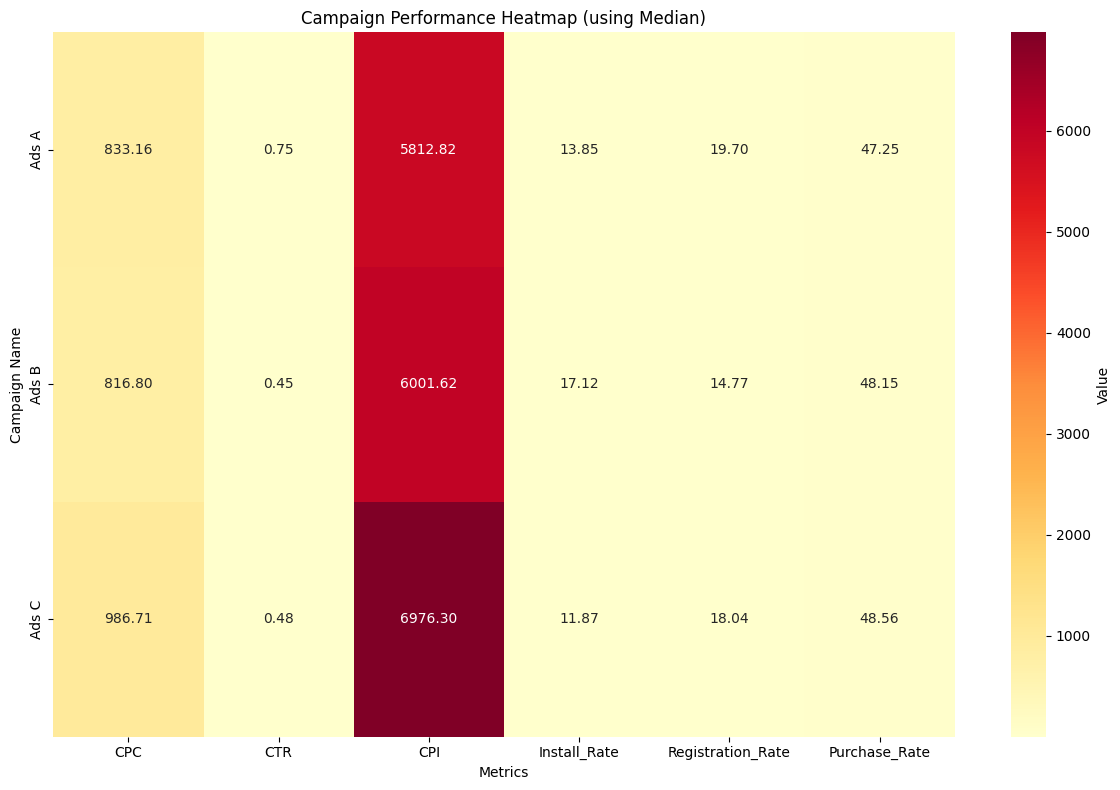

In [ ]:
# Campaign Comparison Heatmap
campaign_kpis = df.groupby('Ad Name').agg({
    'CPC': 'median',
    'CTR': 'median',
    'CPI': 'median',
    'Install_Rate': 'median',
    'Registration_Rate': 'median',
    'Purchase_Rate': 'median'
}).round(2)

plt.figure(figsize=(12, 8))
sns.heatmap(campaign_kpis, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Value'})
plt.title('Campaign Performance Heatmap (using Median)')
plt.xlabel('Metrics')
plt.ylabel('Campaign Name')
plt.tight_layout()
plt.show()

### Heatmap Analysis Insights

1. **Cost Efficiency**
   - Ads C has highest CPC (986.71) and CPI (6976.30)
   - Ads B shows best cost efficiency with lowest CPC (816.80) and moderate CPI
   - Ads A maintains balanced cost metrics

2. **Engagement Metrics**
   - Ads A leads in CTR (0.75%)
   - Install rates vary from 11.87% to 17.12%

3. **Conversion Performance**
   - Purchase rates are consistent across campaigns (47-49%)
   - Ads B shows highest install rate (17.12%)
   - Registration rates vary between 14-20%

**This suggests Ads B might be the most efficient campaign when balancing costs and performance metrics.**

**This suggests Ads C is the least efficient campaign, spending more to achieve similar or worse results compared to other campaigns.**

## Daily Ad Spend vs Purchase Trend Analysis

This visualization examines the relationship between daily advertising expenditure and purchase conversions. Key aspects analyzed:

1. Daily spending patterns and fluctuations
2. Purchase volume trends over time
3. Overall campaign effectiveness

The interactive plot includes trend lines to highlight the general direction of both metrics over the month of July 2020.

In [ ]:
# Create trend lines data
z1 = np.polyfit(range(len(daily_metrics['Date'])), daily_metrics['Ads Spent'], 1)
p1 = np.poly1d(z1)
trend_spend = p1(range(len(daily_metrics['Date'])))

z2 = np.polyfit(range(len(daily_metrics['Date'])), daily_metrics['Purchases'], 1)
p2 = np.poly1d(z2)
trend_purchases = p2(range(len(daily_metrics['Date'])))

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Ad Spend trace
fig.add_trace(
    go.Scatter(
        x=daily_metrics['Date'],
        y=daily_metrics['Ads Spent'],
        name="Ad Spend",
        mode='lines',
        line=dict(color='#2E86C1', width=2)
    ),
    secondary_y=False
)

# Add Ad Spend trend line
fig.add_trace(
    go.Scatter(
        x=daily_metrics['Date'],
        y=trend_spend,
        name="Ad Spend Trend",
        line=dict(color='#1B4F72', width=2, dash='dash'),
        opacity=0.3
    ),
    secondary_y=False
)

# Add Purchases trace
fig.add_trace(
    go.Scatter(
        x=daily_metrics['Date'],
        y=daily_metrics['Purchases'],
        name="Purchases",
        mode='lines',
        line=dict(color='red', width=2)
    ),
    secondary_y=True
)

# Add Purchases trend line
fig.add_trace(
    go.Scatter(
        x=daily_metrics['Date'],
        y=trend_purchases,
        name="Purchases Trend",
        line=dict(color='darkred', width=2, dash='dash'),
        opacity=0.3
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Daily Ad Spend vs Purchases Trend Analysis<br>July 2020',
    xaxis_title='Date',
    yaxis_title='Ad Spend Amount',
    yaxis2_title='Number of Purchases',
    hovermode='x unified',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        font=dict(size=10)
    ),
    width=1000,
    height=600
)

# Update axes
fig.update_xaxes(tickangle=45)
fig.update_yaxes(title_text="Ad Spend Amount", secondary_y=False, color='#2E86C1')
fig.update_yaxes(title_text="Number of Purchases", secondary_y=True, color='red')

# Show plot
fig.show()

### Key Observations from Trend Analysis

1. **Spending Patterns**
   - Overall declining trend in ad spend (blue trend line)
   - High volatility with two major spending spikes around July 10-13

2. **Purchase Trends**
   - Slight upward trend in purchases (red trend line)
   - Highest purchase volumes occur mid-month

3. **Spend-Purchase Relationship**
   - Purchase peaks often lag behind spending peaks
   - Later month shows better efficiency with lower spend maintaining purchase levels

4. **Recommendations**
   - Investigate mid-month efficiency factors
   - Consider reducing extreme spending variations
   - Focus on periods showing high purchases with moderate spend

## Daily Ad Spend Analysis by Campaign

This visualization breaks down daily advertising expenditure for each campaign (Ads A, B, and C) to understand:

1. Individual campaign spending patterns
2. Spending consistency across campaigns
3. Peak spending periods
4. Budget allocation effectiveness

The line plot shows daily spend variations, helping identify which campaigns maintain consistent budgets versus those with fluctuating spending.

In [ ]:
# Visualize daily spending patterns by campaign
fig = px.line(df, x='Date', y='Ads Spent', color='Ad Name',
              title='Daily Ad Spend by Campaign',
              labels={'Ads Spent': 'Daily Ad Spend (Rp)', 'Date': 'Date'})

fig.update_layout(
    showlegend=True,
    xaxis_title="Date",
    yaxis_title="Ad Spend (Rp)",
    height=500
)

fig.show()

### Key Observations from Campaign Spending

1. **Ads A (Blue)**
   - Shows highest single-day spike (~16M)
   - Generally maintains 2M-6M daily spend
   - Most volatile spending pattern

2. **Ads B (Red)**
   - More consistent spending range (2M-8M)
   - Fewer extreme spikes
   - Shows gradual spending adjustments

3. **Ads C (Green)**
   - Frequent spending fluctuations
   - Multiple peaks around 8M-10M
   - Ends month with declining trend

4. **Overall Patterns**
   - All campaigns show high day-to-day variations
   - Mid-month shows highest collective spending
   - End of month trends toward lower spending

## Conversion Funnel Analysis

This visualization examines the user journey from initial click to final purchase, showing:

1. Total volume at each stage
2. Conversion rates between stages
3. Drop-off points in the user journey
4. Overall funnel efficiency

The funnel chart displays both absolute numbers and relative percentages to help identify:
- Major conversion bottlenecks
- Areas needing optimization
- Relative performance of each stage

In [ ]:
# Print column names to verify
print("Column names in DataFrame:", df.columns.tolist())

# Conversion Funnel with corrected column names
funnel_data = df.agg({
    'Clicks': 'sum',
    'Installs': 'sum',
    'Registrations': 'sum',
    'Purchases': 'sum'
}).to_frame().T

fig3 = go.Figure(go.Funnel(
    y=['Clicks', 'Installs', 'Registrations', 'Purchases'],
    x=[funnel_data['Clicks'].iloc[0], funnel_data['Installs'].iloc[0],
       funnel_data['Registrations'].iloc[0], funnel_data['Purchases'].iloc[0]],
    textinfo="value+percent initial",
    textposition="outside",
    opacity=0.8,
    texttemplate="%{value:,.0f}<br>%{percentInitial:.2%}",  # Added format for 2 decimal places
    marker={
        "color": ["royalblue", "mediumseagreen", "orangered", "purple"],
        "line": {"width": [2, 2, 2, 2], "color": ["white", "white", "white", "white"]}
    }
))

fig3.update_layout(
    title={
        'text': "Conversion Funnel Analysis",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=1000,
    height=600,
    showlegend=False,
    margin=dict(t=100, b=100, l=100, r=100)
)

fig3.show()

Column names in DataFrame: ['Date', 'Ad Name', 'Reach', 'Impressions', 'Ads Spent', 'Clicks', 'Installs', 'Registrations', 'Purchases', 'CPC', 'CTR', 'CPI', 'Install_Rate', 'Registration_Rate', 'Purchase_Rate']


### Key Funnel Insights
**Critical Observations**
   - Major drop-off occurs between clicks and installs
   - Registration stage shows significant user loss
   - High conversion rate for registered users to purchase
   - Overall funnel efficiency (Click to Purchase): 1.18%